# Data Analysis on the Hugging Face Silicone Maptask Dataset

In [10]:
import numpy as np
import matplotlib.pyplot as plt

from datasets import load_dataset

In [11]:
dataset = load_dataset("silicone", "maptask")

Found cached dataset silicone (C:/Users/asaju/.cache/huggingface/datasets/silicone/maptask/1.0.0/af617406c94e3f78da85f7ea74ebfbd3f297a9665cb54adbae305b03bc4442a5)
100%|██████████| 3/3 [00:00<00:00, 812.74it/s]


In [12]:
# Separate the dataset into train val and test
train_dataset = dataset["train"]
val_dataset = dataset["validation"]
test_dataset = dataset["test"]

# Separate X (Utterance) and y (Dialogue_Act)
train_X = train_dataset["Utterance"]
train_y = train_dataset["Dialogue_Act"]

val_X = val_dataset["Utterance"]
val_y = val_dataset["Dialogue_Act"]

test_X = test_dataset["Utterance"]
test_y = test_dataset["Dialogue_Act"]

In [13]:
# Convert to arrays
train_X = np.array(train_X)
train_y = np.array(train_y)

val_X = np.array(val_X)
val_y = np.array(val_y)

test_X = np.array(test_X)
test_y = np.array(test_y)

## Label Distribution

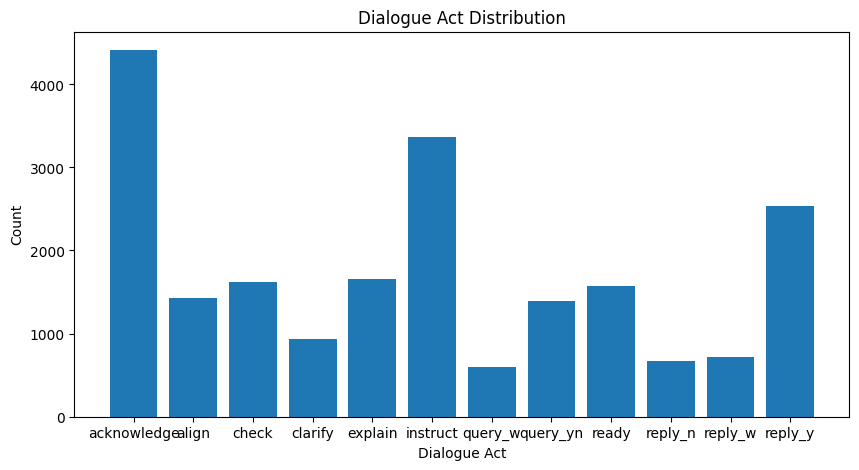

In [15]:
# Plot a bar chart with the count of each dialogue act
plt.figure(figsize=(10, 5))
plt.bar(np.unique(train_y, return_counts=True)[0], np.unique(train_y, return_counts=True)[1])
plt.title("Dialogue Act Distribution")
plt.xlabel("Dialogue Act")
plt.ylabel("Count")
plt.show()


There are a lot of labels which means a confusion matrix will be useful to debug confusion between labels and measure performance

At least the dataset is somewhat balanced

## Human Level Performance Measurement

In this part we will print labelled examples to try to understand what the labels mean and what rules decide what label to use

We will then try to guess the label on 24 examples to measure Human Level Performance

HLP can be used as a performance baseline and this experiment is useful to predict which errors complexionist models are prone to do

In [16]:
# For each dialogue act, give 3 examples of utterances
for dialogue_act in np.unique(train_y):
    print(f"{dialogue_act}:")
    for i in range(3):
        print(f"    {train_X[np.where(train_y == dialogue_act)[0][i]]}")
    print()

acknowledge:
    uh-huh
    okay
    right okay oops that was

align:
    okay
    okay
    okay

check:
    on the right-hand side roughly just
    right down there
    underneath the diamond mine

clarify:
    right beside it
    above the carved stones
    you're heading from the indian country to the gold mine but trying to avoid the gold rock so come down to the bottom of

explain:
    i've got a gallows to the left like d-- below the left
    oh no i have got a gold mine but it's it's a it's a good bit below that
    i said a graveyard

instruct:
    okay the start part is at the top left-hand corner
    ehm you're coming the s-- for three inches down below that
    you just go straight down underneath it

query_w:
    how far underneath the diamond mine
    in a curve or a s-- tight angle
    how far down do you want me to go

query_yn:
    do you have a diamond mine there
    do you have a graveyard just along from the diamond mine
    do you have carved stones

ready:
    well

In [22]:
# Sample 100 utterances and their labels
sample_X = train_X[500:600]
sample_y = train_y[500:600]
guesses = []

# Print the samples one by one
for i in range(len(sample_X)):
    print(f"Utterance: {sample_X[i]}")
    guess = input()
    guesses.append(guess)
    print(f"Dialouge Act: {sample_y[i]}")
    print()


Utterance: go down to the bottom half of the lake but ehm start straightening out as if you were going back to where you started but le-- leave about an inch between the path where you went round the lake and the path where you're coming out of it
Dialouge Act: instruct

Utterance: you want me to trace back my steps
Dialouge Act: check

Utterance: no
Dialouge Act: reply_n

Utterance: you've gone halfway round the lake
Dialouge Act: align

Utterance: right
Dialouge Act: reply_y

Utterance: right
Dialouge Act: acknowledge

Utterance: go down the sort of slightly flat side the the side that's about an inch of the lake f-- just follow that down
Dialouge Act: instruct

Utterance: i don't have a flat side
Dialouge Act: explain

Utterance: oh dear
Dialouge Act: acknowledge

Utterance: right okay
Dialouge Act: ready

Utterance: right
Dialouge Act: ready

Utterance: i'm at the bottom of the lake
Dialouge Act: explain

Utterance: you're at the bottom
Dialouge Act: acknowledge

Utterance: okay
Di

KeyboardInterrupt: Interrupted by user

In [25]:
# Print the utterances, guesses and labels
for i in range(len(guesses)):
    print(f"Utterance: {sample_X[i]}")
    print(f"Guess: {guesses[i]}")
    print(f"Label: {sample_y[i]}")
    print()


Utterance: go down to the bottom half of the lake but ehm start straightening out as if you were going back to where you started but le-- leave about an inch between the path where you went round the lake and the path where you're coming out of it
Guess: instruct
Label: instruct

Utterance: you want me to trace back my steps
Guess: query_yn
Label: check

Utterance: no
Guess: reply_n
Label: reply_n

Utterance: you've gone halfway round the lake
Guess: clarify
Label: align

Utterance: right
Guess: ready
Label: reply_y

Utterance: right
Guess: reply_y
Label: acknowledge

Utterance: go down the sort of slightly flat side the the side that's about an inch of the lake f-- just follow that down
Guess: reply_y
Label: instruct

Utterance: i don't have a flat side
Guess: explain
Label: explain

Utterance: oh dear
Guess: ready
Label: acknowledge

Utterance: right okay
Guess: ready
Label: ready

Utterance: right
Guess: ready
Label: ready

Utterance: i'm at the bottom of the lake
Guess: clarify
Lab

The human accuracy is at 54.1% (13/24)

This sets a baseline performance and highlights challenges when predicting these labels: some labels are very similar
- "right" can be ready but can also be acknowledge or reply_y which highlights intersection between labels
- clarify ("right down there") and check ("right beside it") can be confused without punctuation
